<a href="https://colab.research.google.com/github/hoops92/DS-Unit-1-Build/blob/master/DS_Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Research Question:

For investors, economists, and the public, the S&P 500 index is a key benchmark of how not only the top 500 companies in the United States are performing, but it also is a vital benchmark in evaluating how the entire economy/market is performing as a whole, which is why it is important to compare and contrast how companies in the S&P 500 are performing in meaningful ways. Sector is a crucial categorical factor that describes what companies do in a particular segment of the economy to generate revenue, and understanding how a company's chosen Sector affects a company's performance can help people make better and more informed decisions about which companies are both the safest to invest in and the best to get the highest return on investment (ROI) from. 

## How do different Sectors in the S&P 500 financially compare to one another in terms of their size (Market Cap) and other metrics, and do certain Sectors hold more influence over how the S&P 500 performs than other Sectors? 

## Do the biggest companies in the S&P 500 hold significant influence over how the S&P 500 index performs? 

In [0]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

In [0]:
# Load Data
sp500 = pd.read_csv('https://datahub.io/core/s-and-p-500-companies-financials/r/constituents-financials.csv')

In [3]:
sp500.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [4]:
# Check for number of rows and columns
sp500.shape

(505, 14)

In [0]:
# Drop nonuseful columns
sp500 = sp500.drop('SEC Filings', axis='columns')

In [0]:
# Drop nonuseful columns
sp500 = sp500.drop('Symbol', axis='columns')

In [7]:
# Load dataset with nonuseful columns
sp500

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.7700,175.490000,138721055226,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.3900,48.925000,10783419933,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.6000,42.280000,102121042306,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.8600,60.050000,181386347059,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.6000,114.820000,98765855553,5.643228e+09,2.604117,10.62
5,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.9450,38.930000,52518668144,2.704000e+09,10.595120,5.16
6,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.3600,142.000000,6242377704,5.878000e+08,1.795347,3.55
7,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.4500,114.451000,94550214268,2.538040e+09,13.092818,11.06
8,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.5500,78.810000,8123611867,8.539410e+08,1.130106,2.51
9,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.6500,9.700000,11191663795,3.390000e+08,2.109196,21.47


In [8]:
# Check for NaN values
sp500.isnull().sum()

Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
dtype: int64

In [9]:
# Check data types
sp500.dtypes

Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap          int64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
dtype: object

In [0]:
# Fill in NaN values
sp500["Price/Earnings"].fillna("0", inplace = True)
sp500["Price/Book"].fillna("0", inplace = True) 

In [0]:
# Convert values in the EBITDA Column from scientific notation to an integers
sp500['EBITDA'] = sp500['EBITDA'].astype('int64')
# Rename Market Cap and EBITDA Columns
sp500.rename(columns={'Market Cap':'Market Cap (in millions)','EBITDA':'EBITDA (in millions)'}, inplace=True)
# Convert values in the EBITDA (in millions) and Market Cap (in millions) to (in millions)
sp500['Market Cap (in millions)'] = sp500['Market Cap (in millions)'].div(1000000).round(0)
sp500['EBITDA (in millions)'] = sp500['EBITDA (in millions)'].div(1000000).round(0)

In [12]:
# Provide brief descriptive stats summary
sp500.describe()

,Price,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap (in millions),EBITDA (in millions),Price/Sales
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,103.830634,1.895953,3.753743,122.623832,83.536616,49239.431683,3590.318812,3.941705
std,134.427636,1.537214,5.689036,155.362140,105.725473,90050.166682,6840.542160,3.460110
min,2.820000,0.000000,-28.010000,6.590000,2.800000,2626.000000,-5067.000000,0.153186
25%,46.250000,0.794834,1.490000,56.250000,38.430000,12732.000000,774.000000,1.629490
50%,73.920000,1.769255,2.890000,86.680000,62.850000,21401.000000,1614.000000,2.896440
75%,116.540000,2.781114,5.140000,140.130000,96.660000,45120.000000,3693.000000,4.703842
max,1806.060000,12.661196,44.090000,2067.990000,1589.000000,809508.000000,79386.000000,20.094294


In [13]:
# Display Top 10 Companies with highest Market Cap
sp500.sort_values(by='Market Cap (in millions)', ascending=False).head(10).reset_index()

,index,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap (in millions),EBITDA (in millions),Price/Sales,Price/Book
0,51,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.1000,131.1200,809508.0,79386.0,3.458609,5.66
1,27,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.0000,824.3000,733824.0,34217.0,6.801692,4.7
2,28,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.8900,803.1903,728536.0,32714.0,6.772653,4.67
3,311,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.0700,63.2200,689978.0,41079.0,7.113097,9.49
4,30,Amazon.com Inc,Consumer Discretionary,1350.50,296.16,0.000000,6.16,1498.0000,812.5000,685873.0,16132.0,3.927053,24.28
5,187,"Facebook, Inc.",Information Technology,171.58,27.9,0.000000,5.39,195.3200,132.4400,523423.0,23624.0,13.241967,7.08
6,263,JPMorgan Chase & Co.,Financials,107.88,15.43,1.984584,6.30,117.3529,81.6350,386614.0,0.0,3.371499,1.6
7,261,Johnson & Johnson,Health Care,126.36,17.31,2.556688,0.39,148.3200,113.1500,353062.0,22430.0,4.632622,4.74
8,185,Exxon Mobil Corp.,Energy,76.07,21.37,4.003120,1.88,89.3000,76.0500,326149.0,39052.0,1.770194,1.85
9,66,Bank of America Corp,Financials,29.74,16.34,1.536000,1.55,32.6700,22.0700,321478.0,0.0,3.201187,1.24


### 5 out of the top 10 companies in the S&P 500 with the highest Market Caps were in the Information Technology Sector.

### DISCLAIMER: Alphabet Inc. (Google) is in the top ten twice because of how its stocks are classfied into 2 different categories.

In [14]:
# Display Top 10 Companies with highest EBITDA
sp500.sort_values(by='EBITDA (in millions)', ascending=False).head(10).reset_index()

,index,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap (in millions),EBITDA (in millions),Price/Sales,Price/Book
0,51,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.10,131.1200,809508.0,79386.0,3.458609,5.66
1,58,AT&T Inc,Telecommunication Services,35.57,12.14,5.415651,4.76,42.70,32.5500,226713.0,49653.0,1.408315,1.8
2,474,Verizon Communications,Telecommunication Services,49.04,13.08,4.626544,7.36,54.77,42.8000,208092.0,45745.0,1.645254,7.96
3,311,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.07,63.2200,689978.0,41079.0,7.113097,9.49
4,185,Exxon Mobil Corp.,Energy,76.07,21.37,4.003120,1.88,89.30,76.0500,326149.0,39052.0,1.770194,1.85
5,27,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.00,824.3000,733824.0,34217.0,6.801692,4.7
6,28,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.89,803.1903,728536.0,32714.0,6.772653,4.67
7,480,Wal-Mart Stores,Consumer Staples,100.02,23.1,1.983471,4.39,109.98,66.8900,304681.0,30721.0,0.820994,3.89
8,105,Chevron Corp.,Energy,112.30,27.52,3.885853,4.85,133.88,102.5500,218979.0,28877.0,1.648986,1.71
9,122,Comcast Corp.,Consumer Discretionary,38.19,18.54,1.892902,4.74,44.00,34.7800,186477.0,28675.0,2.179775,2.65


### 4 out of the top 10 companies/stocks in the S&P 500 with the highest EBITDA's (Earnings Before Interest, Taxes, Depreciation, and Amortization) were in the Information Technology Sector.

### DISCLAIMER: Alphabet Inc. (Google) is in the top ten twice because of how its stocks are classfied into 2 different categories.

In [15]:
# Display Top 10 Companies with highest Earnings/Share
sp500.sort_values(by='Earnings/Share', ascending=False).head(10).reset_index()

,index,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap (in millions),EBITDA (in millions),Price/Sales,Price/Book
0,61,AutoZone Inc,Consumer Discretionary,718.57,16.31,0.000000,44.09,797.8900,491.1300,19922.0,2347.0,1.851043,136.23
1,372,Priceline.com Inc,Consumer Discretionary,1806.06,24.26,0.000000,42.66,2067.9900,1589.0000,91817.0,4803.0,9.176564,6.92
2,23,"Allergan, Plc",Health Care,164.20,10.65,1.643289,38.35,256.8000,160.0700,56669.0,-2888.0,4.820115,0.83
3,103,Charter Communications,Consumer Discretionary,348.65,162.92,0.000000,34.08,408.8300,308.3000,86709.0,14694.0,2.120863,2.27
4,73,BlackRock,Financials,509.38,22.49,2.164356,30.30,594.5200,368.0000,85908.0,5684.0,6.915820,2.95
5,178,Everest Re Group Ltd.,Financials,241.06,27.24,2.107823,23.71,277.1700,208.8100,10132.0,0.0,2.099199,1.16
6,302,McKesson Corp.,Health Care,150.23,11.68,0.889878,22.74,178.8600,133.8200,31535.0,7232.0,0.153186,2.68
7,27,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.0000,824.3000,733824.0,34217.0,6.801692,4.7
8,28,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.8900,803.1903,728536.0,32714.0,6.772653,4.67
9,338,Norfolk Southern Corp.,Industrials,136.89,20.65,2.018503,18.73,157.1499,109.2700,40544.0,4737.0,3.852591,3.09


In [16]:
# Display Top 10 Companies with lowest Market Cap
sp500.sort_values(by='Market Cap (in millions)', ascending=True).head(10).reset_index()

,index,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap (in millions),EBITDA (in millions),Price/Sales,Price/Book
0,104,Chesapeake Energy,Energy,2.82,4.7,0.000000,-6.44,6.590,2.800,2626.0,1470.0,0.407652,1.84
1,412,Signet Jewelers,Consumer Discretionary,49.38,6.65,2.473075,7.03,77.940,46.090,3034.0,853.0,0.756470,1.38
2,353,Patterson Companies,Health Care,32.88,14.05,3.072378,1.79,48.295,32.070,3210.0,360.0,0.787279,2.34
3,386,Range Resources Corp.,Energy,12.82,35.61,0.609756,-2.79,34.090,12.700,3256.0,820.0,1.962434,0.59
4,324,Navient,Financials,13.38,7.56,4.558404,1.01,16.970,11.481,3693.0,0.0,0.698658,1.02
5,170,Envision Healthcare,Health Care,35.34,10.91,0.000000,-0.48,73.000,23.770,4213.0,827.0,1.227099,0.64
6,57,Assurant Inc,Financials,85.16,33.27,2.531359,9.08,106.985,85.910,4654.0,0.0,0.982187,1.12
7,133,CSRA Inc.,Information Technology,30.85,15.12,1.275917,1.83,33.790,27.380,5135.0,543.0,1.332484,11.37
8,405,SCANA Corp,Utilities,35.60,8.75,6.683034,4.16,71.280,35.310,5229.0,1459.0,1.651705,0.92
9,384,Quanta Services Inc.,Industrials,33.51,17.54,0.000000,1.28,40.105,30.230,5330.0,649.0,0.778934,1.43


In [17]:
# Display Top 10 Companies with lowest EBITDA
sp500.sort_values(by='EBITDA (in millions)', ascending=True).head(10).reset_index()

,index,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap (in millions),EBITDA (in millions),Price/Sales,Price/Book
0,193,FirstEnergy Corp,Utilities,30.64,11.18,4.673807,-14.49,35.22,27.930,13706.0,-5067.0,1.299448,2.19
1,23,"Allergan, Plc",Health Care,164.20,10.65,1.643289,38.35,256.80,160.070,56669.0,-2888.0,4.820115,0.83
2,229,Hess Corporation,Energy,43.00,-9.33,2.267060,-19.94,55.48,37.250,14016.0,-819.0,3.780475,1.08
3,336,Noble Energy Inc,Energy,25.43,105.96,1.477105,-2.32,39.60,22.985,13177.0,-518.0,4.697645,1.44
4,143,Dentsply Sirona,Health Care,56.85,22.65,0.600343,1.99,68.98,52.535,13391.0,-411.0,4.626262,1.8
5,59,Autodesk Inc,Information Technology,104.81,-77.07,0.000000,-2.61,131.10,81.750,24348.0,-378.0,16.506820,224.13
6,209,General Electric,Industrials,14.45,13.76,3.147541,-0.72,30.59,14.710,132249.0,-206.0,1.088761,1.7
7,299,Mattel Inc.,Consumer Discretionary,16.00,-14.68,0.000000,-3.06,26.30,12.710,5843.0,-204.0,1.186372,3.87
8,245,Incyte,Health Care,83.92,-119.89,0.000000,0.54,153.15,84.210,18221.0,-82.0,17.026990,10.25
9,360,Perrigo,Health Care,84.44,0,0.731261,-28.01,95.93,63.680,12326.0,0.0,3.385007,2.03


### 4 out of the 10 companies with the lowest EBITDA (Earnings Before Interest, Taxes, Depreciation, and Amortization) were in the Health Care Sector.

In [18]:
# Display Top 10 Companies with lowest Earnings/Share
sp500.sort_values(by='Earnings/Share', ascending=True).head(10).reset_index()

,index,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap (in millions),EBITDA (in millions),Price/Sales,Price/Book
0,360,Perrigo,Health Care,84.44,0,0.731261,-28.01,95.930,63.6800,12326.0,0.0,3.385007,2.03
1,79,Brighthouse Financial Inc,Financials,55.44,22.63,0.000000,-24.62,75.000,52.7510,7067.0,0.0,1.418836,0.51
2,229,Hess Corporation,Energy,43.00,-9.33,2.267060,-19.94,55.480,37.2500,14016.0,-819.0,3.780475,1.08
3,193,FirstEnergy Corp,Utilities,30.64,11.18,4.673807,-14.49,35.220,27.9300,13706.0,-5067.0,1.299448,2.19
4,125,Concho Resources,Energy,140.09,84.39,0.000000,-11.04,162.910,106.7300,22022.0,2151.0,12.271951,2.61
5,144,Devon Energy Corp.,Energy,34.94,23.93,0.652884,-6.89,47.250,28.7947,19317.0,3723.0,2.066041,2.85
6,328,Newfield Exploration Co,Energy,26.38,13.12,0.000000,-6.50,43.740,24.4100,5695.0,896.0,4.703259,4.51
7,104,Chesapeake Energy,Energy,2.82,4.7,0.000000,-6.44,6.590,2.8000,2626.0,1470.0,0.407652,1.84
8,323,National Oilwell Varco Inc.,Energy,32.64,-77.71,0.587372,-6.40,41.895,29.9000,12940.0,353.0,2.520963,0.91
9,43,Anadarko Petroleum Corp,Energy,56.20,-21.29,1.702997,-5.90,70.000,39.9600,32129.0,3115.0,3.968221,2.88


### 7 out of the 10 companies with the lowest Earnings per Share were in the Energy Sector. 

In [19]:
# To calcualte percentages that os each sector that comprise the S&P 500.
sp500['Sector'].value_counts(normalize=True) * 100

Consumer Discretionary        16.633663
Information Technology        13.861386
Financials                    13.465347
Industrials                   13.267327
Health Care                   12.079208
Consumer Staples               6.732673
Real Estate                    6.534653
Energy                         6.336634
Utilities                      5.544554
Materials                      4.950495
Telecommunication Services     0.594059
Name: Sector, dtype: float64

In [20]:
# The mean of the Consumer Discretionary Market Cap.
sp500[sp500['Sector'] == 'Consumer Discretionary']['Market Cap (in millions)'].mean()

38256.71428571428

In [21]:
# The mean of the Information Technology Market Cap.
sp500[sp500['Sector'] == 'Information Technology']['Market Cap (in millions)'].mean()

96101.77142857143

In [22]:
# The mean of the Financials Market Cap.
sp500[sp500['Sector'] == 'Financials']['Market Cap (in millions)'].mean()

50627.16176470588

In [23]:
# The mean of the Indutrials Market Cap.
sp500[sp500['Sector'] == 'Industrials']['Market Cap (in millions)'].mean()

35993.07462686567

In [24]:
# The mean of the Health Care Market Cap.
sp500[sp500['Sector'] == 'Health Care']['Market Cap (in millions)'].mean()

53186.24590163935

In [25]:
# The mean of the Consumer Staples Market Cap.
sp500[sp500['Sector'] == 'Consumer Staples']['Market Cap (in millions)'].mean()

61384.58823529412

In [26]:
# The mean of the Real Estate Market Cap.
sp500[sp500['Sector'] == 'Real Estate']['Market Cap (in millions)'].mean()

18949.030303030304

In [27]:
# The mean of the Energy Market Cap.
sp500[sp500['Sector'] == 'Energy']['Market Cap (in millions)'].mean()

42416.0

In [28]:
# The mean of the Utilities Market Cap.
sp500[sp500['Sector'] == 'Utilities']['Market Cap (in millions)'].mean()

21844.071428571428

In [29]:
# The mean of the Materials Market Cap.
sp500[sp500['Sector'] == 'Materials']['Market Cap (in millions)'].mean()

27691.96

In [30]:
# The mean of the Telecommunication Services Market Cap.
sp500[sp500['Sector'] == 'Telecommunication Services']['Market Cap (in millions)'].mean()

151014.0

In [31]:
# The total S&P 500 Market Cap
sp500['Market Cap (in millions)'].sum()

24865913.0

### The following below calculates the percentages that each Sector holds in the S&P 500. 

In [32]:
(sp500[sp500['Sector'] == 'Consumer Discretionary']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

12.923571

In [33]:
(sp500[sp500['Sector'] == 'Information Technology']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

27.053597

In [34]:
(sp500[sp500['Sector'] == 'Financials']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

13.844845

In [35]:
(sp500[sp500['Sector'] == 'Industrials']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

9.69816

In [36]:
(sp500[sp500['Sector'] == 'Health Care']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

13.047424

In [37]:
(sp500[sp500['Sector'] == 'Consumer Staples']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

8.393321

In [38]:
(sp500[sp500['Sector'] == 'Real Estate']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() *100).round(6)

2.51476

In [39]:
(sp500[sp500['Sector'] == 'Energy']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

5.458525

In [40]:
(sp500[sp500['Sector'] == 'Utilities']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

2.459729

In [41]:
(sp500[sp500['Sector'] == 'Materials']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

2.784129

In [42]:
(sp500[sp500['Sector'] == 'Telecomminication Services']['Market Cap (in millions)'].sum() / sp500['Market Cap (in millions)'].sum() * 100).round(6)

0.0

<BarContainer object of 505 artists>

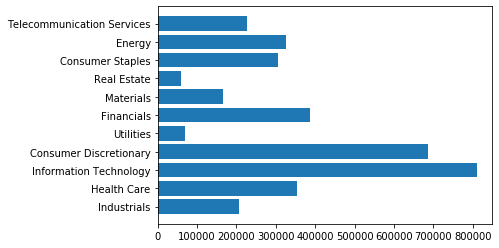

In [43]:
# A bar graph to compare Market Cap sizes in the S&P 500
plt.barh(sp500['Sector'], sp500['Market Cap (in millions)'])

<BarContainer object of 505 artists>

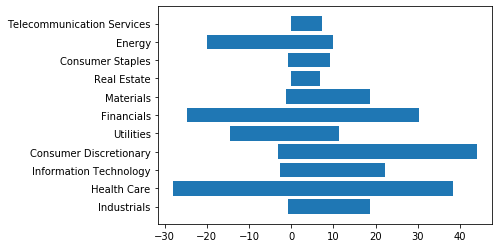

In [44]:
# a bar graph to illustrate the range of Earnings/Share each sector has to demonstrate volatility and risk in each sector.
plt.barh(sp500['Sector'], sp500['Earnings/Share'])

<BarContainer object of 505 artists>

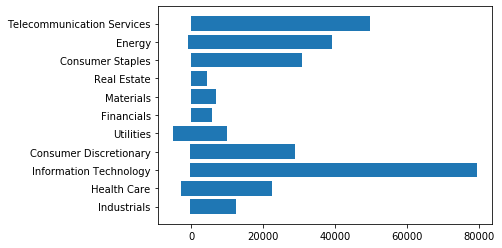

In [45]:
# A bar graph to illustrate the range of EBITDA each sector has to showcase volatility and risk.
plt.barh(sp500['Sector'], sp500['EBITDA (in millions)'])

In [46]:
# Inequality to find # companies that are valued over 10 billion dollars.
(sp500['Market Cap (in millions)'] > 10000000000).value_counts()

False    505
Name: Market Cap (in millions), dtype: int64

In [47]:
# Inequality to find # companies that are valued between 2 billion dollars and 10 billion dollars.
sp500['Market Cap (in millions)'].between(2000000000, 10000000000, inclusive=True).value_counts()

False    505
Name: Market Cap (in millions), dtype: int64

In [48]:
# Inequality to find # companies that are valued under 2 billion dollars.
(sp500['Market Cap (in millions)'] < 2000000000).value_counts()

True    505
Name: Market Cap (in millions), dtype: int64

In [49]:
### A donut chart displaying the percentages of each Sector that make up the S & P 500.
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['Consumer Discretionary', 'Information Technology', 'Financials', 'Industrials', 'Health Care', 
          'Consumer Staples', 'Real Estate', 'Energy', 'Utilities','Materials', 'Telecommunication Services']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[16.633663, 13.861386, 13.465347, 13.267327, 12.079208, 
                                            6.732673, 6.534653, 6.336634, 5.544554, 4.950495, 0.594059], name="Sector Percentages"),
              1, 1)

# Create hole
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="S&P 500 Sector Percentages",
    # Add text in the center of the donut chart.
    annotations=[dict(text='Industry', x=0.18, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [50]:
# A donut chart to visualize how each sector percentage of the S&P 500's Market Cap.
labels = sp500['Sector']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=sp500['Market Cap (in millions)'], name="S&P 500 Sector Percentages for Market Cap"),
              1, 1)

# Create hole
fig.update_traces(hole=.8, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="S&P 500 Sector Percentages for Market Cap",
    # Add text in the center of the donut chart.
    annotations=[dict(text='Market Cap', x=0.16, y=0.5, font_size=20, showarrow=False)])
fig.show()

### The pie chart above illustrates that the Information Technology Sector holds the biggest percentage of the Market Cap in the S&P 500. Information Technology almost doubles the Financials Sector in how much Market Cap they control. 

### It is important to understand which companies have the most influence over the S&P 500 individually. The pie chart below shows which companies hold significant weight over how the S&P 500 performs.

In [51]:
# Pie chart to visualize which companies in particular comprise the S&P 500
labels = ['Apple Inc.', 'Alphabet Inc. Class A', 'Alphabet Inc. Class C', 'Microsoft Corp.', 'Amazon.com Inc.', 'Facebook, Inc.', 'Rest of the S&P 500 Companies']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[3.26, 2.95, 2.93, 2.77, 2.76, 2.1, 83.23], name="S&P 500 Company Percentages for Market Cap"),
              1, 1)

fig.update_layout(
    title_text=" S&P Company Market Cap",
    # Add text in the center of the donut chart.
    annotations=[dict(text='Market Cap', x=0.16, y=0.5, font_size=20, showarrow=False)])
fig.show()

### Apple, Alphabet Inc. Class A & Class C (Google), Microsoft , Amazon, and Facebook have the top 5 Market Caps. Based on the pie chart above, it shows that 4 out of the 5 biggest companies that have significant influence over the S&P 500 are companies in the Information Technology Sector. The top 5 companies comprise a total percentage of 16.77% of the total S&P Market Cap, which significantly affects how the S&P 500 performs. This is a more accurate and faithful representation of the S&P Market Cap than was demonstrated in the example that was presented in week 1 for module 4. 

### Companies typically are valued as a Large Cap(Companies valued over 10 billion dollars), Mid Cap(Companies valued between 2 billion dollars and 10 billion dollars, or a Small Cap (Companies valued under 2 billion dollars).

In [52]:
# Pie Chart displaying what type of companies make up the S&P 500 by size.
labels = ['Large Cap', 'Mid Cap', 'Small Cap']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=[85.346535, 14.653465, 0.0], name="S&P 500 Company Percentages for Market Cap"),
              1, 1)

fig.update_layout(
    title_text="S&P 500 Company Large, Mid, and Small Cap Size Percentages",
    # Add text in the center of the donut chart.
    annotations=[dict(text='Market Cap', x=0.16, y=0.5, font_size=20, showarrow=False)])
fig.show()

### The vast majority of companies in the S&P 500 are Large Cap(Valued at over $10 billion dollars). There are no companies that are valued under 2 billion dollars in the S&P 500. 